# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

### Carga y manipulación de datos

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
iris = datasets.load_iris()
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

### Declarar variables

In [7]:
batch_size = 20
x1_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

### Crear el modelo
$$x_2 = Ax_1+b \Rightarrow x_2-Ax_1-b=0$$

In [8]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [9]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_prediction = tf.subtract(x1_data, my_add)

### Función de pérdidas y propagación hacia atrás

In [10]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target)
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optimizer.minimize(xentropy)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Inicializar las variables

In [11]:
init = tf.global_variables_initializer()
session.run(init)

## Entrenar el modelo

In [12]:
for i in range(1000):
    rand_idx = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_idx]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_idx]])
    session.run(train_step, feed_dict={x1_data:rand_x1, x2_data:rand_x2, y_target:rand_y})
    if(i+1)%100==0:
        print('Paso #'+str(i+1)+", A="+str(session.run(A))+", b ="+str(session.run(b)))

Paso #100, A=[[7.224268]], b =[[-2.4131703]]
Paso #200, A=[[8.597618]], b =[[-3.5516186]]
Paso #300, A=[[9.554851]], b =[[-4.194216]]
Paso #400, A=[[10.224854]], b =[[-4.6272445]]
Paso #500, A=[[10.668783]], b =[[-5.1024885]]
Paso #600, A=[[11.159912]], b =[[-5.353393]]
Paso #700, A=[[11.533844]], b =[[-5.6970787]]
Paso #800, A=[[11.929688]], b =[[-5.8694997]]
Paso #900, A=[[12.197247]], b =[[-6.12917]]
Paso #1000, A=[[12.423092]], b =[[-6.381844]]


### Modelo final

In [13]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

#### Representación de la separación

In [14]:
x = np.linspace(0,3,num = 100)
abline_values = []
for i in x:
    abline_values.append(slope*i+intercept)
    
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]

no_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
no_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]

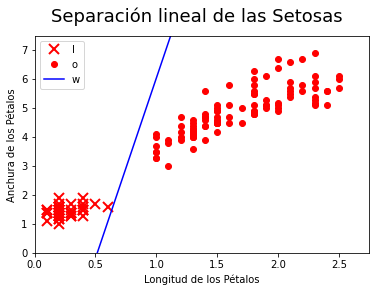

In [15]:
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='Setosa')
plt.plot(no_setosa_x, no_setosa_y, 'ro', label = "No setosa")
plt.plot(x, abline_values, 'b-')
plt.suptitle('Separación lineal de las Setosas', fontsize = 18)
plt.xlabel("Longitud de los Pétalos")
plt.ylabel("Anchura de los Pétalos")
plt.legend("lower right")
plt.xlim([0,2.75])
plt.ylim([0, 7.5])
plt.show()